Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
df = pd.read_csv('water.csv',usecols= [1,2,3,4])
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [ ]:
(df.isna().mean() * 100).round(2)

location     0.0
town         0.0
mortality    0.0
hardness     0.0
dtype: float64

In [ ]:
df.shape

(61, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [ ]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


## Задание 1

Точечный график взаимосвязи жесткости воды и смертности

Text(37.722222222222214, 0.5, 'Смертность')

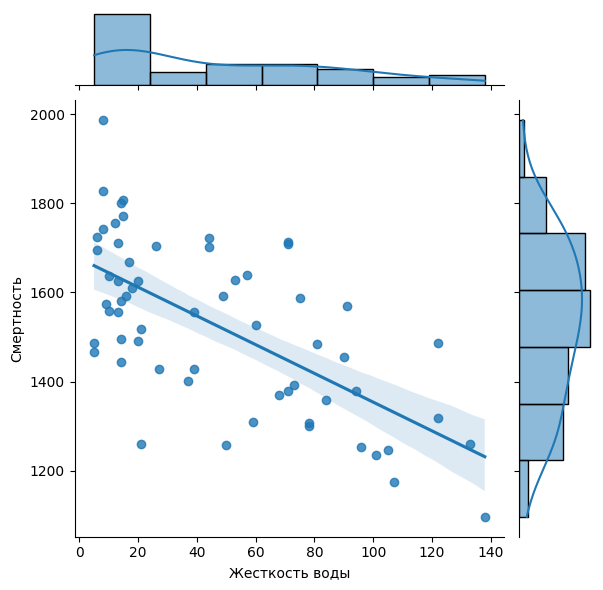

In [ ]:
sns.jointplot(x='hardness', y ='mortality', data=df, kind = 'reg')
plt.xlabel('Жесткость воды', fontdict={'size':10})
plt.ylabel('Смертность', fontdict={'size':10})

На визуализации видно, что есть обратная зависимость, но слабая

коэффициент корреляции Пирсона

In [ ]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


коэффициент корреляции Спирмена

In [ ]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


коэффициенты корреляции Пирсона и Спирмана точно также показывают слабую обратную связь



Построим модель линейной регрессии,задавать количество на тестовую выборку не будем, оставим 20% по умолчанию из-за малого объема имеющихся данных

In [ ]:
X = df[['hardness']]
y = df[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape
X_test.shape
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[-2.72894103]])

In [ ]:
model.intercept_

array([1648.17043052])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1427.12620673],
       [1448.957735  ],
       [1285.22127293],
       [1607.236315  ],
       [1487.16290949],
       [1386.19209121],
       [1435.31302983],
       [1399.83679638],
       [1593.59160983],
       [1435.31302983],
       [1626.33890225],
       [1454.41561707],
       [1609.96525604],
       [1601.77843293],
       [1514.45231983],
       [1462.60244018]])

In [ ]:
y_test

,mortality
59,1485
10,1392
34,1259
28,1772
33,1309
14,1254
13,1307
24,1569
55,1625
7,1299


Визуализируем модель

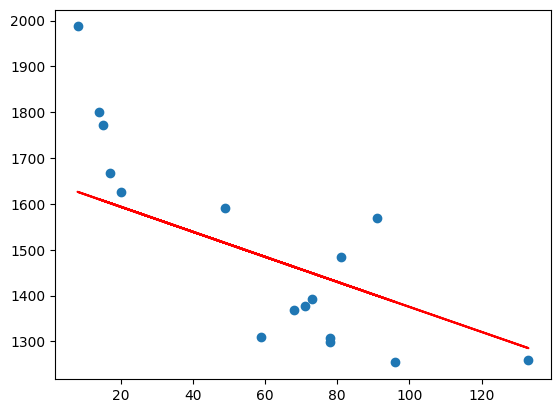

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Видим сильный разброс тестовых точек от красной прямой

Рассчитаем коэффициент детерминации

In [ ]:
model.score(X_test, y_test)

0.5379830512702503

Коэффициент детерминации равен 0,5, что означает есть заметная связь между содержанием кальция в воде и сметроностью, но не существенная

Выведем график остатков

<Axes: ylabel='Count'>

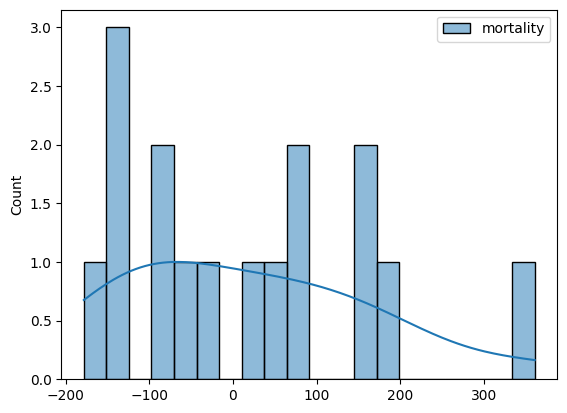

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

Хвосты распределения не равны, больше далеких ошибок

Построенная модель не очень хорошо объясняет взаимосвязь

Возвращаясь к вопросу первого задания - мы не можем полностью отрицать взаимосвязь жесткости воды и средней годовой смертности, связь присутствует, но очень слабая

# Задание 2

Разделим данные на две группы по локации Север и ЮГ

In [ ]:
north = df.loc[df['location'] == 'North']
south = df.loc[df['location'] == 'South']



---


**Север**


---



---



Text(37.722222222222214, 0.5, 'Смертность')

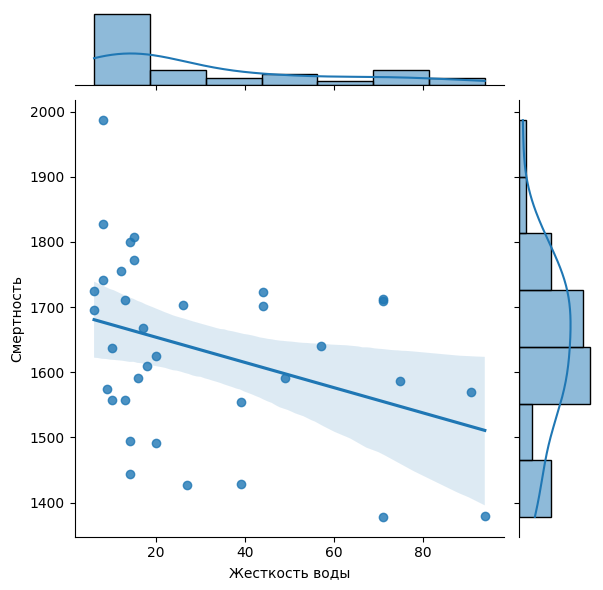

In [ ]:
sns.jointplot(x='hardness', y ='mortality', data=north, kind = 'reg')
plt.xlabel('Жесткость воды', fontdict={'size':10})
plt.ylabel('Смертность', fontdict={'size':10})

In [ ]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
X = north[['hardness']]
y = north[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape
X_test.shape
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[-1.4878019]])

In [ ]:
model.intercept_

array([1648.84792733])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1629.50650257],
       [1543.21399208],
       [1628.01870066],
       [1626.53089876],
       [1626.53089876],
       [1639.9211159 ],
       [1628.01870066],
       [1636.94551209],
       [1633.96990828]])

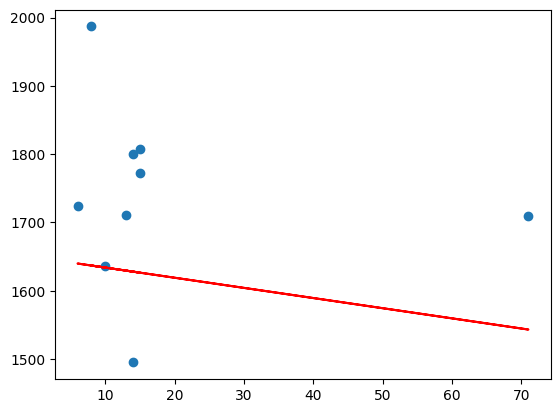

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

<Axes: ylabel='Count'>

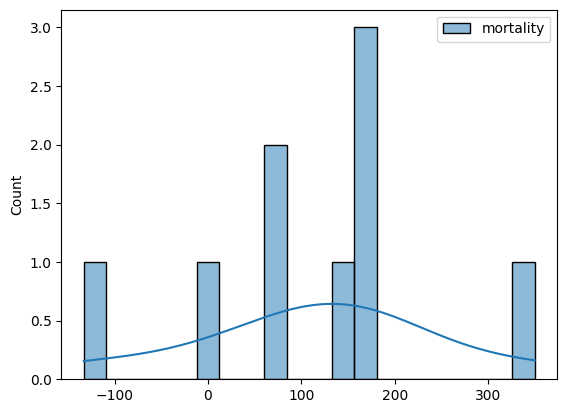

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

In [ ]:
model.score(X_test, y_test)

-0.8542399614981535






---


**Юг**

---



Text(37.722222222222214, 0.5, 'Смертность')

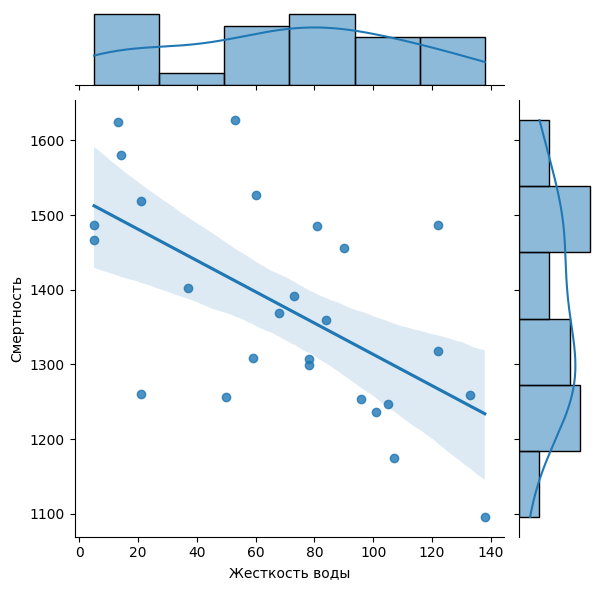

In [ ]:
sns.jointplot(x='hardness', y ='mortality', data=south, kind = 'reg')
plt.xlabel('Жесткость воды', fontdict={'size':10})
plt.ylabel('Смертность', fontdict={'size':10})

In [ ]:
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
X = south[['hardness']]
y = south[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape
X_test.shape
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[-1.77141309]])

In [ ]:
model.intercept_

array([1492.83056953])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1257.23262829],
       [1372.37447927],
       [1398.94567565],
       [1303.28936868],
       [1354.66034835],
       [1276.7181723 ],
       [1468.03078624]])

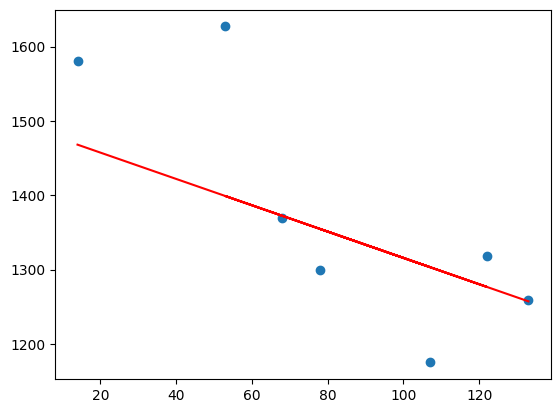

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

<Axes: ylabel='Count'>

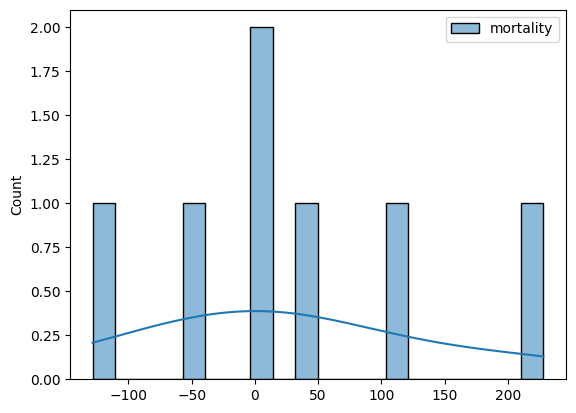

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

In [ ]:
model.score(X_test, y_test)

0.48920845467521323



---



---


В северных городах вода менее жетская, чем в южных городых

В северных городах связь между жесткостью воды и смертностью слабее, чем в южных

После разделения данных на группы прогнозные модели заметно ухудшились

Исходя из проведенного анализа отрицать влияние жесткости воды на смертность мы не можем, но и точно подтвердить наличие данной взаимосвязи не представляется возможным, из-за малого количества данных и отсутствия данных по другим факторам влияющих на смертность